In [1]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

In [ ]:
# Function to train YOLO model for a new class
# Assume you have a dataset of images labeled for the new class "Banky".
# The dataset should be structured with images and labels as YOLO format requires.
def train_model():
    # Define the path to your custom dataset
    data_path = 'path/to/your/dataset.yaml'  # Replace with your dataset YAML file

    # Load the YOLOv11 model
    model = YOLO('yolo11n.pt')  # Load the pre-trained model

    # Train the model with your custom data
    # Adjust epochs and image size as necessary
    model.train(data=data_path, epochs=100, imgsz=640)

    # Save the trained model
    model.save('yolo11n_custom.pt')


0: 448x640 1 person, 12 cars, 1 bus, 1 truck, 63.6ms
Speed: 3.9ms preprocess, 63.6ms inference, 2.8ms postprocess per image at shape (1, 3, 448, 640)
detected classes: person, truck, car, bus


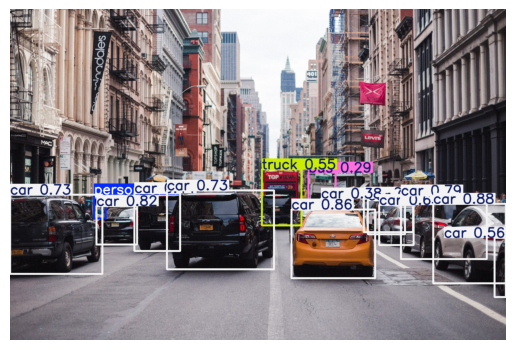

In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load the YOLO model
model = YOLO('yolo11n.pt')

# Load an image for object detection
image_path = 'img1.jpg'  # Replace with your image path
image = cv2.imread(image_path)

# Perform object detection
results = model(image)

# Extract detected object names
detected_objects_list = [model.names[int(cls)] for cls in results[0].boxes.cls]
detected_objects_set = set(detected_objects_list)

# Print detected classes in the desired format
print("detected classes:", ', '.join(detected_objects_set))

# Plot and show the results
annotated_image = results[0].plot()
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [ ]:
model = YOLO('yolo11n.pt')

# Open the webcam for real-time object detection
# Use 0 for the default camera (e.g., MacBook camera)
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open webcam.")
    exit()

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    if not ret:
        print("Error: Could not read frame.")
        break

    # Perform object detection
    results = model(frame)

    # Annotate the frame with detection results
    annotated_frame = results[0].plot()

    # Display the annotated frame
    cv2.imshow('YOLOv11 Real-Time Detection', annotated_frame)

    # Exit when 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture and close any OpenCV windows
cap.release()
cv2.destroyAllWindows()